<a href="https://colab.research.google.com/github/josephmhernandez/SeizureDetection/blob/master/Bidirectional_Seizure_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Build Model

In [0]:

import tensorflow as tf
#Trying to get more consistant training...
def build_model_bi_gru():
    i = tf.keras.initializers.RandomNormal(mean=0.0, stddev=.025, seed=None)
    glo = tf.keras.initializers.glorot_normal(seed=1)
    he = tf.keras.initializers.he_normal(seed=1)

    l1 = tf.keras.regularizers.l1(0.01)
    l2 = tf.keras.regularizers.l2(0.01)
    l1_l2 = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

    zero = tf.keras.initializers.Zeros()

    input_torso = tf.keras.layers.Input(shape=(120,12), name='Torso_Input')
    input_left_arm = tf.keras.layers.Input(shape=(120,6), name = 'Left_Arm_Input')
    input_right_arm = tf.keras.layers.Input(shape=(120,6), name = 'Right_Arm_Input')
    input_right_leg = tf.keras.layers.Input(shape=(120,12), name = 'Right_Leg_Input')
    input_left_leg = tf.keras.layers.Input(shape=(120,12), name = 'Left_Leg_Input')

    torso_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name = 'torso_gru')) (input_torso)
    r_arm_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='r_arm_gru')) (input_right_arm)
    l_arm_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='l_arm_gru')) (input_left_arm)
    l_leg_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='l_leg_gru')) (input_left_leg)
    r_leg_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='r_leg_gru')) (input_right_leg)

    torso_r_arm_con = tf.keras.layers.concatenate([torso_branch, r_arm_branch], axis=-1, name='concat_torso_r_arm')
    torso_l_arm_con = tf.keras.layers.concatenate([torso_branch, l_arm_branch], axis=-1, name='concat_torso_l_arm')
    torso_r_leg_con = tf.keras.layers.concatenate([torso_branch, r_leg_branch], axis=-1, name='concat_torso_r_leg')
    torso_l_leg_con = tf.keras.layers.concatenate([torso_branch, l_leg_branch], axis=-1, name='concat_torso_l_leg')

    torso_r_arm_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Right-Arm_gru')) (torso_r_arm_con)
    torso_r_arm_out = tf.keras.layers.Dropout(.8) (torso_r_arm_out)
    torso_l_arm_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Left-Arm_gru')) (torso_l_arm_con)
    torso_l_arm_out = tf.keras.layers.Dropout(.8) (torso_l_arm_out)
    torso_r_leg_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Right-Leg_gru')) (torso_r_leg_con)
    torso_r_leg_out = tf.keras.layers.Dropout(.8) (torso_r_leg_out)
    torso_l_leg_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Left-Leg_gru')) (torso_l_leg_con)
    torso_l_leg_out = tf.keras.layers.Dropout(.8) (torso_l_leg_out)

    all_con = tf.keras.layers.concatenate([torso_r_arm_out, torso_l_arm_out, torso_r_leg_out, torso_l_leg_out], name='concat_all_4_body_parts')
    all_out_1 = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, activation='relu', return_sequences=False, kernel_initializer=glo)) (all_con)
    all_out_1 = tf.keras.layers.Dropout(.8) (all_out_1)
    all_out_3 = tf.keras.layers.Dense(1, activation='sigmoid', name='Dense_1_Sigmoid')(all_out_1)
    
    model = tf.keras.Model(inputs=[input_torso, input_left_arm, input_right_arm, input_left_leg, input_right_leg], outputs=all_out_3)
    # sgd = optimizers.SGD(lr=0.000001, decay=1e-6, momentum=0.5, nesterov=True)

    adam_1 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(optimizer=adam_1, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


def build_model_bi_gru_drop():
    i = tf.keras.initializers.RandomNormal(mean=0.0, stddev=.025, seed=None)
    glo = tf.keras.initializers.glorot_normal(seed=1)
    he = tf.keras.initializers.he_normal(seed=1)

    l1 = tf.keras.regularizers.l1(0.01)
    l2 = tf.keras.regularizers.l2(0.01)
    l1_l2 = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

    zero = tf.keras.initializers.Zeros()

    input_torso = tf.keras.layers.Input(shape=(120,12), name='Torso_Input')
    input_left_arm = tf.keras.layers.Input(shape=(120,6), name = 'Left_Arm_Input')
    input_right_arm = tf.keras.layers.Input(shape=(120,6), name = 'Right_Arm_Input')
    input_right_leg = tf.keras.layers.Input(shape=(120,12), name = 'Right_Leg_Input')
    input_left_leg = tf.keras.layers.Input(shape=(120,12), name = 'Left_Leg_Input')

    torso_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name = 'torso_gru')) (input_torso)
    r_arm_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='r_arm_gru')) (input_right_arm)
    l_arm_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='l_arm_gru')) (input_left_arm)
    l_leg_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='l_leg_gru')) (input_left_leg)
    r_leg_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='r_leg_gru')) (input_right_leg)

    torso_r_arm_con = tf.keras.layers.concatenate([torso_branch, r_arm_branch], axis=-1, name='concat_torso_r_arm')
    torso_l_arm_con = tf.keras.layers.concatenate([torso_branch, l_arm_branch], axis=-1, name='concat_torso_l_arm')
    torso_r_leg_con = tf.keras.layers.concatenate([torso_branch, r_leg_branch], axis=-1, name='concat_torso_r_leg')
    torso_l_leg_con = tf.keras.layers.concatenate([torso_branch, l_leg_branch], axis=-1, name='concat_torso_l_leg')

    torso_r_arm_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Right-Arm_gru')) (torso_r_arm_con)
    torso_l_arm_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Left-Arm_gru')) (torso_l_arm_con)
    torso_r_leg_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Right-Leg_gru')) (torso_r_leg_con)
    torso_l_leg_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Left-Leg_gru')) (torso_l_leg_con)

    all_con = tf.keras.layers.concatenate([torso_r_arm_out, torso_l_arm_out, torso_r_leg_out, torso_l_leg_out], name='concat_all_4_body_parts')
    all_out_1 = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, activation='relu', return_sequences=False, kernel_initializer=glo)) (all_con)
    all_out_1 = tf.keras.layers.Dropout(.8) (all_out_1)
    all_out_3 = tf.keras.layers.Dense(1, activation='sigmoid', name='Dense_1_Sigmoid')(all_out_1)
    
    model = tf.keras.Model(inputs=[input_torso, input_left_arm, input_right_arm, input_left_leg, input_right_leg], outputs=all_out_3)
    # sgd = optimizers.SGD(lr=0.000001, decay=1e-6, momentum=0.5, nesterov=True)

    adam_1 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(optimizer=adam_1, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

def build_model_bi_lstm():
    i = tf.keras.initializers.RandomNormal(mean=0.0, stddev=.025, seed=None)
    glo = tf.keras.initializers.glorot_normal(seed=1)
    he = tf.keras.initializers.he_normal(seed=1)

    l1 = tf.keras.regularizers.l1(0.01)
    l2 = tf.keras.regularizers.l2(0.01)
    l1_l2 = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

    zero = tf.keras.initializers.Zeros()

    input_torso = tf.keras.layers.Input(shape=(120,12), name='Torso_Input')
    input_left_arm = tf.keras.layers.Input(shape=(120,6), name = 'Left_Arm_Input')
    input_right_arm = tf.keras.layers.Input(shape=(120,6), name = 'Right_Arm_Input')
    input_right_leg = tf.keras.layers.Input(shape=(120,12), name = 'Right_Leg_Input')
    input_left_leg = tf.keras.layers.Input(shape=(120,12), name = 'Left_Leg_Input')

    torso_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name = 'torso_gru')) (input_torso)
    r_arm_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='r_arm_gru')) (input_right_arm)
    l_arm_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='l_arm_gru')) (input_left_arm)
    l_leg_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='l_leg_gru')) (input_left_leg)
    r_leg_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='r_leg_gru')) (input_right_leg)

    torso_r_arm_con = tf.keras.layers.concatenate([torso_branch, r_arm_branch], axis=-1, name='concat_torso_r_arm')
    torso_l_arm_con = tf.keras.layers.concatenate([torso_branch, l_arm_branch], axis=-1, name='concat_torso_l_arm')
    torso_r_leg_con = tf.keras.layers.concatenate([torso_branch, r_leg_branch], axis=-1, name='concat_torso_r_leg')
    torso_l_leg_con = tf.keras.layers.concatenate([torso_branch, l_leg_branch], axis=-1, name='concat_torso_l_leg')

    torso_r_arm_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Right-Arm_gru')) (torso_r_arm_con)
    torso_l_arm_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Left-Arm_gru')) (torso_l_arm_con)
    torso_r_leg_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Right-Leg_gru')) (torso_r_leg_con)
    torso_l_leg_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Left-Leg_gru')) (torso_l_leg_con)

    all_con = tf.keras.layers.concatenate([torso_r_arm_out, torso_l_arm_out, torso_r_leg_out, torso_l_leg_out], name='concat_all_4_body_parts')
    all_out_1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, activation='relu', return_sequences=False, kernel_initializer=glo)) (all_con)
    all_out_2 = tf.keras.layers.Dropout(.6) (all_out_1)
    all_out_3 = tf.keras.layers.Dense(1, activation='sigmoid', name='Dense_1_Sigmoid')(all_out_2)
    
    model = tf.keras.Model(inputs=[input_torso, input_left_arm, input_right_arm, input_left_leg, input_right_leg], outputs=all_out_3)
    # sgd = optimizers.SGD(lr=0.000001, decay=1e-6, momentum=0.5, nesterov=True)

    adam_1 = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=True)
    model.compile(optimizer=adam_1, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


#Trying to get more consistant training...
def build_model_bi_gru_transfer():
    i = tf.keras.initializers.RandomNormal(mean=0.0, stddev=.025, seed=None)
    glo = tf.keras.initializers.glorot_normal(seed=1)
    he = tf.keras.initializers.he_normal(seed=1)

    l1 = tf.keras.regularizers.l1(0.01)
    l2 = tf.keras.regularizers.l2(0.01)
    l1_l2 = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

    zero = tf.keras.initializers.Zeros()

    input_torso = tf.keras.layers.Input(shape=(120,12), name='Torso_Input')
    input_left_arm = tf.keras.layers.Input(shape=(120,6), name = 'Left_Arm_Input')
    input_right_arm = tf.keras.layers.Input(shape=(120,6), name = 'Right_Arm_Input')
    input_right_leg = tf.keras.layers.Input(shape=(120,12), name = 'Right_Leg_Input')
    input_left_leg = tf.keras.layers.Input(shape=(120,12), name = 'Left_Leg_Input')

    torso_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(12, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name = 'torso_gru')) (input_torso)
    r_arm_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(12, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='r_arm_gru')) (input_right_arm)
    l_arm_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(12, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='l_arm_gru')) (input_left_arm)
    l_leg_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(12, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='l_leg_gru')) (input_left_leg)
    r_leg_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(12, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='r_leg_gru')) (input_right_leg)

    torso_r_arm_con = tf.keras.layers.concatenate([torso_branch, r_arm_branch], axis=-1, name='concat_torso_r_arm')
    torso_l_arm_con = tf.keras.layers.concatenate([torso_branch, l_arm_branch], axis=-1, name='concat_torso_l_arm')
    torso_r_leg_con = tf.keras.layers.concatenate([torso_branch, r_leg_branch], axis=-1, name='concat_torso_r_leg')
    torso_l_leg_con = tf.keras.layers.concatenate([torso_branch, l_leg_branch], axis=-1, name='concat_torso_l_leg')

    torso_r_arm_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(30, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Right-Arm_gru')) (torso_r_arm_con)
    torso_l_arm_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(30, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Left-Arm_gru')) (torso_l_arm_con)
    torso_r_leg_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(30, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Right-Leg_gru')) (torso_r_leg_con)
    torso_l_leg_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(30, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Left-Leg_gru')) (torso_l_leg_con)

    all_con = tf.keras.layers.concatenate([torso_r_arm_out, torso_l_arm_out, torso_r_leg_out, torso_l_leg_out], name='concat_all_4_body_parts')
    all_out_1 = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, activation='relu', return_sequences=False, kernel_initializer=glo)) (all_con)
    all_out_1 = tf.keras.layers.Dropout(.2) (all_out_1)
    all_out_3 = tf.keras.layers.Dense(6, activation='softmax', name='Dense_1_Softmax')(all_out_1)
    
    model = tf.keras.Model(inputs=[input_torso, input_left_arm, input_right_arm, input_left_leg, input_right_leg], outputs=all_out_3)
    # sgd = optimizers.SGD(lr=0.000001, decay=1e-6, momentum=0.5, nesterov=True)

    #Changed this.... to amsgrad = True, adn LR = .01 instead on .001. 
    adam_1 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(optimizer=adam_1, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


def build_model_bi_gru_transfer_larger():
    i = tf.keras.initializers.RandomNormal(mean=0.0, stddev=.025, seed=None)
    glo = tf.keras.initializers.glorot_normal(seed=1)
    he = tf.keras.initializers.he_normal(seed=1)

    l1 = tf.keras.regularizers.l1(0.01)
    l2 = tf.keras.regularizers.l2(0.01)
    l1_l2 = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

    zero = tf.keras.initializers.Zeros()

    input_torso = tf.keras.layers.Input(shape=(120,12), name='Torso_Input')
    input_left_arm = tf.keras.layers.Input(shape=(120,6), name = 'Left_Arm_Input')
    input_right_arm = tf.keras.layers.Input(shape=(120,6), name = 'Right_Arm_Input')
    input_right_leg = tf.keras.layers.Input(shape=(120,12), name = 'Right_Leg_Input')
    input_left_leg = tf.keras.layers.Input(shape=(120,12), name = 'Left_Leg_Input')

    torso_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name = 'torso_gru')) (input_torso)
    r_arm_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='r_arm_gru')) (input_right_arm)
    l_arm_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='l_arm_gru')) (input_left_arm)
    l_leg_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='l_leg_gru')) (input_left_leg)
    r_leg_branch = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='r_leg_gru')) (input_right_leg)

    torso_r_arm_con = tf.keras.layers.concatenate([torso_branch, r_arm_branch], axis=-1, name='concat_torso_r_arm')
    torso_l_arm_con = tf.keras.layers.concatenate([torso_branch, l_arm_branch], axis=-1, name='concat_torso_l_arm')
    torso_r_leg_con = tf.keras.layers.concatenate([torso_branch, r_leg_branch], axis=-1, name='concat_torso_r_leg')
    torso_l_leg_con = tf.keras.layers.concatenate([torso_branch, l_leg_branch], axis=-1, name='concat_torso_l_leg')

    torso_r_arm_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Right-Arm_gru')) (torso_r_arm_con)
    torso_l_arm_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Left-Arm_gru')) (torso_l_arm_con)
    torso_r_leg_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Right-Leg_gru')) (torso_r_leg_con)
    torso_l_leg_out = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences = True, kernel_initializer=glo, bias_initializer = zero, name='Torso-Left-Leg_gru')) (torso_l_leg_con)

    all_con = tf.keras.layers.concatenate([torso_r_arm_out, torso_l_arm_out, torso_r_leg_out, torso_l_leg_out], name='concat_all_4_body_parts')
    all_out_1 = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, activation='relu', return_sequences=False, kernel_initializer=glo)) (all_con)
    all_out_1 = tf.keras.layers.Dropout(.2) (all_out_1)
    all_out_3 = tf.keras.layers.Dense(6, activation='softmax', name='Dense_1_Softmax')(all_out_1)
    
    model = tf.keras.Model(inputs=[input_torso, input_left_arm, input_right_arm, input_left_leg, input_right_leg], outputs=all_out_3)
    # sgd = optimizers.SGD(lr=0.000001, decay=1e-6, momentum=0.5, nesterov=True)

    #Changed this.... to amsgrad = True, adn LR = .01 instead on .001. 
    adam_1 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(optimizer=adam_1, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model



In [0]:
mod = build_model_bi_gru_drop()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Torso_Input (InputLayer)        [(None, 120, 12)]    0                                            
__________________________________________________________________________________________________
Right_Arm_Input (InputLayer)    [(None, 120, 6)]     0                                            
__________________________________________________________________________________________________
Left_Arm_Input (InputLayer)     [(None, 120, 6)]     0                                            
__________________________________________________________________________________________________
Right_Leg_Input (InputLayer)    [(None, 120, 12)]    0                                            
______________________________________________________________________________________________

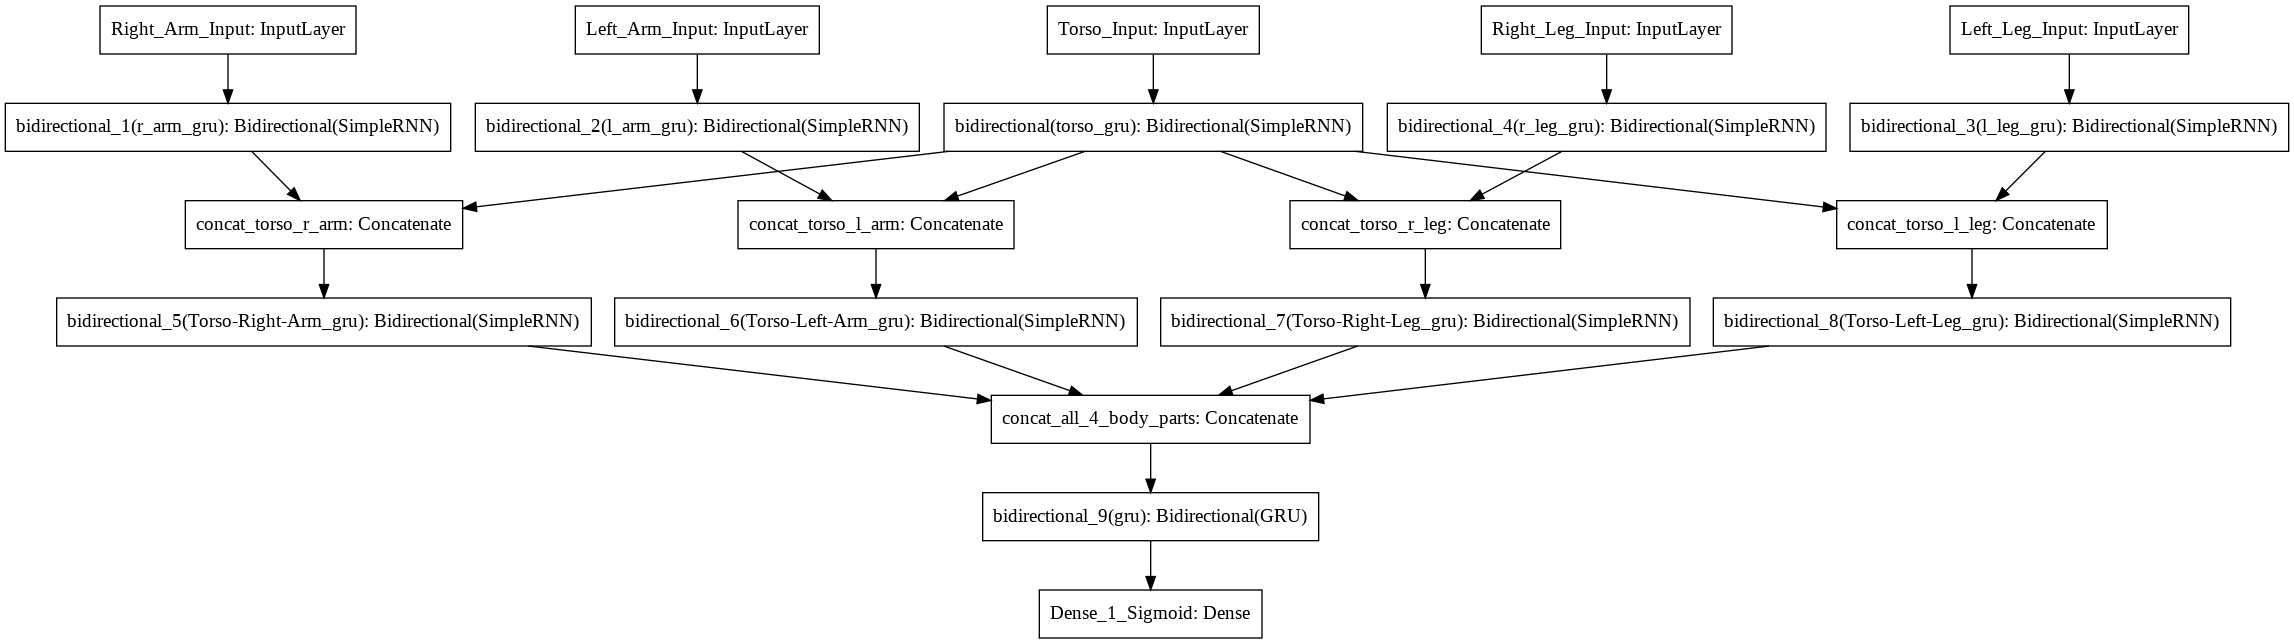

In [0]:
mode = build_model_bi_gru()
mode.summary()
tf.keras.utils.plot_model(mode, show_shapes=False)


## Load Data Generator

In [0]:
#Allows multiprocessing during training. 
import numpy as np
import random
import json
import os
import tensorflow as tf

class DataGenerator(tf.keras.utils.Sequence):

    def __init__(self, list_IDs, labels, location="location__", batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        #'Initialization'
        #(number of channels, number of classes, batch size)
        self.dim = dim
        self.batch_size = batch_size
        #Dictionary whwere labels[ID] = label
        self.labels = labels

        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
        self.location_data = location


    def on_epoch_end(self):
        #Updates indexes after each epoch
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def tester(self, list_IDs_temp):
        [x1, x2, x3, x4, x5], y = self.__data_generation(list_IDs_temp)

        return [x1, x2, x3, x4, x5], y

        
    def __data_generation(self, list_IDs_temp):
        y = np.empty((self.batch_size), dtype=int)

        r_arm_data = np.empty((self.batch_size, 120, 6))
        l_arm_data = np.empty((self.batch_size, 120, 6))
        r_leg_data = np.empty((self.batch_size, 120, 12))
        l_leg_data = np.empty((self.batch_size, 120, 12))
        torso_data = np.empty((self.batch_size, 120, 12))

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            opened_data = np.load(self.location_data + ID) 
            #(120, 50)
                
            _temp_r_arm_data = np.empty((120,6))
            _temp_l_arm_data = np.empty((120,6))
            _temp_r_leg_data = np.empty((120, 12))
            _temp_l_leg_data = np.empty((120, 12))
            _temp_torso_data = np.empty((120, 12))


            for j,mat in enumerate(opened_data):
                #iterate 120 timestamps
                mult = 2
                #(120, 6) pad with 6 zeros 
                _temp_r_arm_data[j,] = np.array([mat[2*mult], mat[mult*2+1], 
                                          mat[3*mult], mat[mult*3+1],
                                          mat[4*mult], mat[mult*4+1]])
                
                #(120, 6) pad with 6 zeros
                _temp_l_arm_data[j,] = np.array([mat[5*mult], mat[mult*5+1], 
                                          mat[6*mult], mat[mult*6+1],
                                          mat[7*mult], mat[mult*7+1]])
                
                #(120, 12)
                _temp_r_leg_data[j,] = np.array([mat[9*mult], mat[mult*9+1], 
                                          mat[10*mult], mat[mult*10+1],
                                          mat[11*mult], mat[mult*11+1],
                                          mat[22*mult], mat[mult*22+1], 
                                          mat[23*mult], mat[mult*23+1],
                                          mat[24*mult], mat[mult*24+1]])
                #(120, 12)
                _temp_l_leg_data[j,] = np.array([mat[12*mult], mat[mult*12+1], 
                                          mat[13*mult], mat[mult*13+1],
                                          mat[14*mult], mat[mult*14+1],
                                          mat[19*mult], mat[mult*19+1], 
                                          mat[20*mult], mat[mult*20+1],
                                          mat[21*mult], mat[mult*21+1]]) 
                
                #(120, 12)
                _temp_torso_data[j,] = np.array([mat[1*mult], mat[mult*1+1], 
                                          mat[2*mult], mat[mult*2+1],
                                          mat[5*mult], mat[mult*5+1],
                                          mat[8*mult], mat[mult*8+1], 
                                          mat[9*mult], mat[mult*9+1],
                                          mat[12*mult], mat[mult*12+1]])

            r_arm_data[i,] = _temp_r_arm_data
            l_arm_data[i,] = _temp_l_arm_data
            r_leg_data[i,] = _temp_r_leg_data
            l_leg_data[i,] = _temp_l_leg_data
            torso_data[i,] = _temp_torso_data

            # Store class
            y[i] = self.labels[ID]
        if(self.n_classes > 1):
            y = tf.keras.utils.to_categorical(y = y, num_classes=self.n_classes)
            
        return [torso_data, l_arm_data, r_arm_data, l_leg_data, r_leg_data], y

    def __len__(self):
        #'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        #'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        [x1, x2, x3, x4, x5], y = self.__data_generation(list_IDs_temp)

        # print("HEREERERE: ")
        # print(X.shape)

###################TO DO make generators and have them here 
        return [x1, x2, x3, x4, x5], y
        # return X, y

    def getLandmarks(self, pyPath):
        #Input -> Location of json files (openPose output).
        #Return -> list of the first 80 outputs in the JSON folders with 75 body landmarks. 
        rtnList = np.zeros((80,50))
        jsonFiles = np.array(os.listdir(pyPath))
        # print('jsonFiles List:', jsonFiles)
        jsonFiles.sort()

        for i,fileName in enumerate(jsonFiles): 
            with open(pyPath + jsonFiles[i]) as jsonOutput:
                data = json.load(jsonOutput)
                try:
                    bodyLandmarks = data['people'][0]['pose_keypoints_2d']
                    #Get rid of the confidence of points
                    bodyLandmarks = [xx for i, xx in enumerate(bodyLandmarks) if i%3 !=2]
                    rtnList[i] = bodyLandmarks
                except:
                    continue
            #Only extracts the first 80 frames/time_steps
            if (i > 78):
                break

        #Should return (frames = 80, landmarks/features = 75)
        return rtnList

## Train Model


In [0]:
import numpy as np
import random 
import os 

#For no more tensor flow warnings. 
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

#Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Get good ratio of training/validation/testing data. 
import os 
import random
import numpy as np
print(len(os.listdir('gdrive/My Drive/Seizure2/all_data_hd_npy/')))

data_files = os.listdir('gdrive/My Drive/Seizure2/all_data_hd_npy/')

data = {}
labels = {}

for _name in data_files:
    if 'Seizure' in _name:
        labels[_name] = 1
    else:
        labels[_name] = 0

random.seed(3)
random.shuffle(data_files)

num_seizure_files = len([ _name for _name in data_files if 'Seizure' in _name])

train_index = int(len(data_files) * .8)
validation_index = int(train_index * .15)

data['test'] = np.array(data_files[train_index:])
data['validation'] = np.array(data_files[:validation_index])
data['train'] = np.array(data_files[validation_index:train_index])

print('Number of Seizure data in dataset: ', num_seizure_files)
print('Total number of files: ', len(data_files))
print('Percentage of Seizure data in dataset: {} %'.format(num_seizure_files/len(data_files)*100))

num_seizure_files_train = len([ _name for _name in data['train'] if 'Seizure' in _name])
num_seizure_files_test = len([ _name for _name in data['test'] if 'Seizure' in _name])
num_seizure_files_validation = len([ _name for _name in data['validation'] if 'Seizure' in _name])

print('Number of training samples: ', len(data['train']))
print('Number of testing samples: ', len(data['test']))
print('Number of validation samples: ', len(data['validation']))
print('Total: ', len(data['train']) + len(data['test']) + len(data['validation']))

print('Percentage of Seizure data in training dataset: {} %'.format(num_seizure_files_train/len(data['train'])*100))
print('Percentage of Seizure data in testing dataset: {} %'.format(num_seizure_files_test/len(data['test'])*100))
print('Percentage of Seizure data in validation dataset: {} %'.format(num_seizure_files_validation/len(data['validation'])*100))


3124
Number of Seizure data in dataset:  922
Total number of files:  3124
Percentage of Seizure data in dataset: 29.513444302176694 %
Number of training samples:  2125
Number of testing samples:  625
Number of validation samples:  374
Total:  3124
Percentage of Seizure data in training dataset: 30.070588235294117 %
Percentage of Seizure data in testing dataset: 27.200000000000003 %
Percentage of Seizure data in validation dataset: 30.213903743315505 %


In [0]:
import os
import numpy as np
import random

import matplotlib.pyplot as plt

#Hyper-parameters 

batch_size = 64
num_epochs = 50
import numpy as np

#Create dictionary entries of all data. 
py_train_path = 'gdrive/My Drive/Seizure2/all_data_hd_npy/'


params ={'location': py_train_path,
        'dim': (120, 12, 5),
          'batch_size': batch_size,
          'n_classes': 1,
          'n_channels': 1,
          'shuffle': True}

validation_params ={'location': py_train_path,
        'dim': (120, 12, 5),
          'batch_size': len(data['validation']),
          'n_classes': 1,
          'n_channels': 1,
          'shuffle': True}
        
test_params = {'location': py_train_path,
        'dim': (120, 12, 5),
          'batch_size': len(data['test']),
          'n_classes': 1,
          'n_channels': 1,
          'shuffle': True}
testing_generator = DataGenerator(data['test'], labels, **test_params)
training_generator = DataGenerator(data['train'], labels, **params)
validating_generator = DataGenerator(data['validation'], labels, **validation_params)

histories = []
model = build_model_bi_gru_drop()
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, to_file='model_shape.png')
filepath="bi-lstm-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=training_generator, validation_data=validating_generator, callbacks = callbacks_list, validation_freq = 1, use_multiprocessing=True, workers=8, epochs=num_epochs,verbose=1)
histories.append(history)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Torso_Input (InputLayer)        [(None, 120, 12)]    0                                            
__________________________________________________________________________________________________
Right_Arm_Input (InputLayer)    [(None, 120, 6)]     0                                            
__________________________________________________________________________________________________
Left_Arm_Input (InputLayer)     [(None, 120, 6)]     0                                            
__________________________________________________________________________________________________
Right_Leg_Input (InputLayer)    [(None, 120, 12)]    0                                            
______________________________________________________________________________________________

In [0]:
# !rm *.hdf5

loss
accuracy
val_loss
val_accuracy


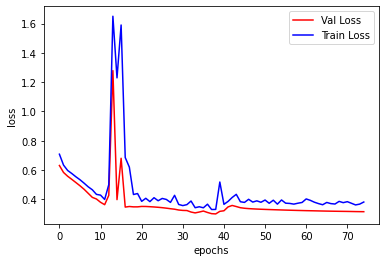

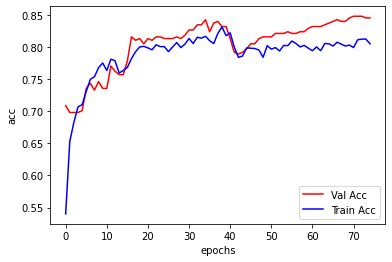

In [0]:
#Plot training. 
import matplotlib.pyplot as plt
for h in history.history:
    print(h)

history = histories[0]
plt.figure()
val_loss = history.history['val_loss']
loss = history.history['loss']
plt.xlabel('epochs')
plt.ylabel('loss')
num_epochs = range(75)

plt.plot(num_epochs, val_loss[:len(num_epochs)], 'r', label = 'Val Loss')
plt.plot( num_epochs, loss[:len(num_epochs)], 'b', label = 'Train Loss')
plt.legend()
plt.show()

val_loss = history.history['val_accuracy']
loss = history.history['accuracy']
plt.xlabel('epochs')
plt.ylabel('acc')
num_epochs = range(75)

plt.plot(num_epochs, val_loss[:len(num_epochs)], 'r', label = 'Val Acc')
plt.plot( num_epochs, loss[:len(num_epochs)], 'b', label = 'Train Acc')
plt.legend()
plt.show()

## Evaluate on Testing Data

In [0]:

# j_model = build_model_rnn()
j_model = tf.keras.models.load_model('bi-lstm-194-0.25.hdf5')

py_train_path = 'gdrive/My Drive/Seizure2/all_data_hd_npy/'
test_params = {'location': py_train_path,
        'dim': (120, 12, 5),
          'batch_size': len(data['test']),
          'n_classes': 1,
          'n_channels': 1,
          'shuffle': True}
testing_generator = DataGenerator(data['test'], labels, **test_params)
j_model.evaluate_generator(generator=testing_generator, steps=None, callbacks=None, max_queue_size=10, workers=0, use_multiprocessing=False, verbose=1)

1/1 [==============================] - 0s 1ms/step - loss: 0.2544 - accuracy: 0.8704


[0.2544204294681549, 0.8704000115394592]

# Prepare Transfer Learning Set

In [0]:
#Load Open Pose
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`


In [0]:
# Function
# Iterate through JSON files of a video and save every 120 as an npy file. 
import json
import numpy as np
import os
def create_120_npy_from_vid_json(read_json_folder, write_folder, save_name):
    newJsonOutput = read_json_folder
    print('Change JSON files to npy files....')
    jsonFiles = np.array(os.listdir(newJsonOutput))
    jsonFiles.sort()

    rtnList = np.zeros((len(jsonFiles),50)) 

    print(len(jsonFiles))
    print('total npy outputs: ' + str(len(jsonFiles) // 120))

    for i,jsonFile in enumerate(jsonFiles): 
        if (i % 1000 == 0): print('\tupdate:' + str(i))
        with open(newJsonOutput + '/' + jsonFiles[i]) as jsonOutput:
            data = json.load(jsonOutput)
            try:
                bodyLandmarks = data['people'][0]['pose_keypoints_2d']    
                #Get rid of the confidence of points
                bodyLandmarks = [xx for p, xx in enumerate(bodyLandmarks) if p%3 !=2]
                #Y - coordinates are opposite. Makes printing out coordinates easier to visualize. 
                for inc in range(len(bodyLandmarks)):
                    if inc % 2 == 1:
                        bodyLandmarks[inc] = 1 - bodyLandmarks[inc]
                
                rtnList[i,] = bodyLandmarks
            except:
                print('oof.' + str(i))
                continue

    # !mkdir {write_folder}
    print('write_npys')
    _count_id = 1
    for j in range(120, len(rtnList), 120):
        _temp_data = rtnList[j-120:j]
        np.save(write_folder + save_name + '_' + str(_count_id) + '.npy', _temp_data)
        _count_id += 1
    
    print('finished')

In [0]:
#Using Kth Dataset. 

#Load OpenPose
#Extract Featues 
#Store into 

import os

#Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')


location = 'gdrive/My Drive/Seizure2/Video_Dataset/walking/'
linux_location= 'gdrive/My\ Drive/Seizure2/Video_Dataset/walking/'
list_boxing = os.listdir(location)
# list_clapping = os.listdir('gdrive/My Drive/Seizure2/Video_Dataset/handclapping')
# list_waving = os.listdir('gdrive/My Drive/Seizure2/Video_Dataset/handwaving')
# list_jogging = os.listdir('gdrive/My Drive/Seizure2/Video_Dataset/jogging')
# list_walking = os.listdir('gdrive/My Drive/Seizure2/Video_Dataset/running')
# list_running = os.listdir('gdrive/My Drive/Seizure2/Video_Dataset/walking')

json_output = '/content/temp/'
train_folder = 'gdrive/My Drive/Seizure2/Video_Dataset/npys/'
count = 1


for vid in list_boxing:
    count += 1
    print('count: ', count)
    newvidInput = linux_location + vid
    
    !./openpose/build/examples/openpose/openpose.bin --tracking 10 --render_pose 0 --video {newvidInput} --write_json {json_output} --model_folder openpose/models --disable_blending --display 0 --number_people_max 1 --scale_number 4 --scale_gap 0.25 --keypoint_scale 3

    title = vid[:len(vid)-4]
    create_120_npy_from_vid_json(read_json_folder=json_output, write_folder=train_folder, save_name=title)

    !rm -rf {json_output}


In [0]:
f = 'gdrive/My\ Drive/Seizure2/Video_Dataset/npys/'
!ls {f}


ls: cannot access 'gdrive/My Drive/Seizure2/Video_Dataset/npys/': No such file or directory


# Cleaning Transfer Dataset

In [0]:
#Load all the new transfer dataset and see the percentage of timestamps with all zeros for an entry. 
#Delete instances where there are a lot of zeros and the action isn't clear

#Thought: debug. Should I delete the instances where there isn't a clear video...
    #For example one person walks in the frame and out the other frame and then walks in again.
    #Discontinuous videos....

import os 
import numpy as np

#Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

location = 'gdrive/My Drive/Seizure2/Video_Dataset/npys/'
data_instances = os.listdir(location)

print("Number of data instances: " + str(len(data_instances)))

removes = 0
for instance in data_instances:
    features = np.load(location + instance)
    # (120 * 50)
    
    num_zeros = 0
    
    for time_stamp_feat in features:
        # (50)
        Add = True
        for t in time_stamp_feat:
            if t != 0:
                Add = False
                break
        
        if (Add):
            num_zeros += 1
    
    if ((num_zeros / 120) > .3):

        removes += 1
        # os.remove(location + instance)


print('Number Removed: ', removes)



    


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Number of data instances: 2095
Number Removed:  10


In [0]:
#Visualize what's happening in the video output 
#import numpy as np
import matplotlib.pyplot as plt
#Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

#Delete: 
#person09_jogging_d2_uncomp_1.npy
#
#
#

_t10 = np.load('gdrive/My Drive/Seizure2/Video_Dataset/npys/person02_jogging_d2_uncomp_1.npy')

print(_t10.shape)

plt.figure()
for i in range(0, len(_t10), 1):
    for j in range(0,50,2):
        plt.xlim(0, 1)
        plt.ylim((0, 1))
        plt.scatter(_t10[i][j], _t10[i][j+1])
       

    plt.pause(.000001)
    
    


# Analyze Transfer Dataset


In [0]:
import os 
import numpy as np

#Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

location = 'gdrive/My Drive/Seizure2/Video_Dataset/npys/'
data_instances = os.listdir(location)


classes = ['walking', 'jogging', 'running', 'clapping', 'waving', 'boxing']

counts = {}

for cl in classes:
    counts[cl] = 0


for filename in data_instances:
    for cl in classes:
        if (cl in filename):
            counts[cl] += 1
            break

    
total = 0
for c in counts:
    total += counts[c]

print(counts)
print('Total: ' + str(total))

for c in counts:
    print(c + ' : ' + str(counts[c] / total * 100))



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
{'walking': 489, 'jogging': 314, 'running': 266, 'clapping': 307, 'waving': 393, 'boxing': 326}
Total: 2095
walking : 23.341288782816232
jogging : 14.988066825775656
running : 12.69689737470167
clapping : 14.653937947494033
waving : 18.758949880668258
boxing : 15.560859188544152


#Training/Testing/Validating Set Creation Transfer Data


In [1]:
#Get good ratio of training/validation/testing data. 
import os 
import random
import numpy as np

#Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

location = 'gdrive/My Drive/Seizure2/Video_Dataset/npys/'
print(len(os.listdir(location)))

data_files = os.listdir(location)
#'walking': 489, 'jogging': 314, 'running': 266, 'clapping': 307, 'waving': 393, 'boxing': 326
data = {}
labels = {}

for _name in data_files:
    if ('walking' in _name):
        labels[_name] = 0
    elif ('jogging' in _name):
        labels[_name] = 1
    elif ('running' in _name):
        labels[_name] = 2
    elif ('clapping' in _name):
        labels[_name] = 3
    elif ('waving' in _name):
        labels[_name] = 4
    elif ('boxing' in _name):
        labels[_name] = 5

random.seed(2)
random.shuffle(data_files)

num_seizure_files = len([ _name for _name in data_files if 'Seizure' in _name])

train_index = int(len(data_files) * .8)
validation_index = int(train_index * .15)

data['test'] = np.array(data_files[train_index:])
data['validation'] = np.array(data_files[:validation_index])
data['train'] = np.array(data_files[validation_index:train_index])

classes = ['walking', 'jogging', 'running', 'clapping', 'waving', 'boxing']
counts = {}
for cl in classes:
    counts[cl] = 0

for filename in data['test']:
    for cl in classes:
        if (cl in filename):
            counts[cl] += 1
            break    
total = 0
for c in counts:
    total += counts[c]

print('Test:   ')
print(counts)

counts = {}
for cl in classes:
    counts[cl] = 0

for filename in data['train']:
    for cl in classes:
        if (cl in filename):
            counts[cl] += 1
            break    
total = 0
for c in counts:
    total += counts[c]

print('')
print('Train:   ')
print(counts)
counts = {}
for cl in classes:
    counts[cl] = 0

for filename in data['validation']:
    for cl in classes:
        if (cl in filename):
            counts[cl] += 1
            break    
total = 0
for c in counts:
    total += counts[c]

print('Validation:   ')
print(counts)

# print('Number of Seizure data in dataset: ', num_seizure_files)
# print('Total number of files: ', len(data_files))
# print('Percentage of Seizure data in dataset: {} %'.format(num_seizure_files/len(data_files)*100))

# num_seizure_files_train = len([ _name for _name in data['train'] if 'Seizure' in _name])
# num_seizure_files_test = len([ _name for _name in data['test'] if 'Seizure' in _name])
# num_seizure_files_validation = len([ _name for _name in data['validation'] if 'Seizure' in _name])

# print('Number of training samples: ', len(data['train']))
# print('Number of testing samples: ', len(data['test']))
# print('Number of validation samples: ', len(data['validation']))
# print('Total: ', len(data['train']) + len(data['test']) + len(data['validation']))

# print('Percentage of Seizure data in training dataset: {} %'.format(num_seizure_files_train/len(data['train'])*100))
# print('Percentage of Seizure data in testing dataset: {} %'.format(num_seizure_files_test/len(data['test'])*100))
# print('Percentage of Seizure data in validation dataset: {} %'.format(num_seizure_files_validation/len(data['validation'])*100))


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
2095
Test:   
{'walking': 95, 'jogging': 68, 'running': 46, 'clapping': 67, 'waving': 81, 'boxing': 62}

Train:   
{'walking': 333, 'jogging': 209, 'running': 185, 'clapping': 213, 'waving': 259, 'boxing': 226}
Validation:   
{'walking': 61, 'jogging': 37, 'running': 35, 'clapping': 27, 'waving': 53, 'boxing': 38}


Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Torso_Input (InputLayer)        [(None, 120, 12)]    0                                            
__________________________________________________________________________________________________
Right_Arm_Input (InputLayer)    [(None, 120, 6)]     0                                            
__________________________________________________________________________________________________
Left_Arm_Input (InputLayer)     [(None, 120, 6)]     0                                            
__________________________________________________________________________________________________
Right_Leg_Input (InputLayer)    [(None, 120, 12)]    0                                            
____________________________________________________________________________________________

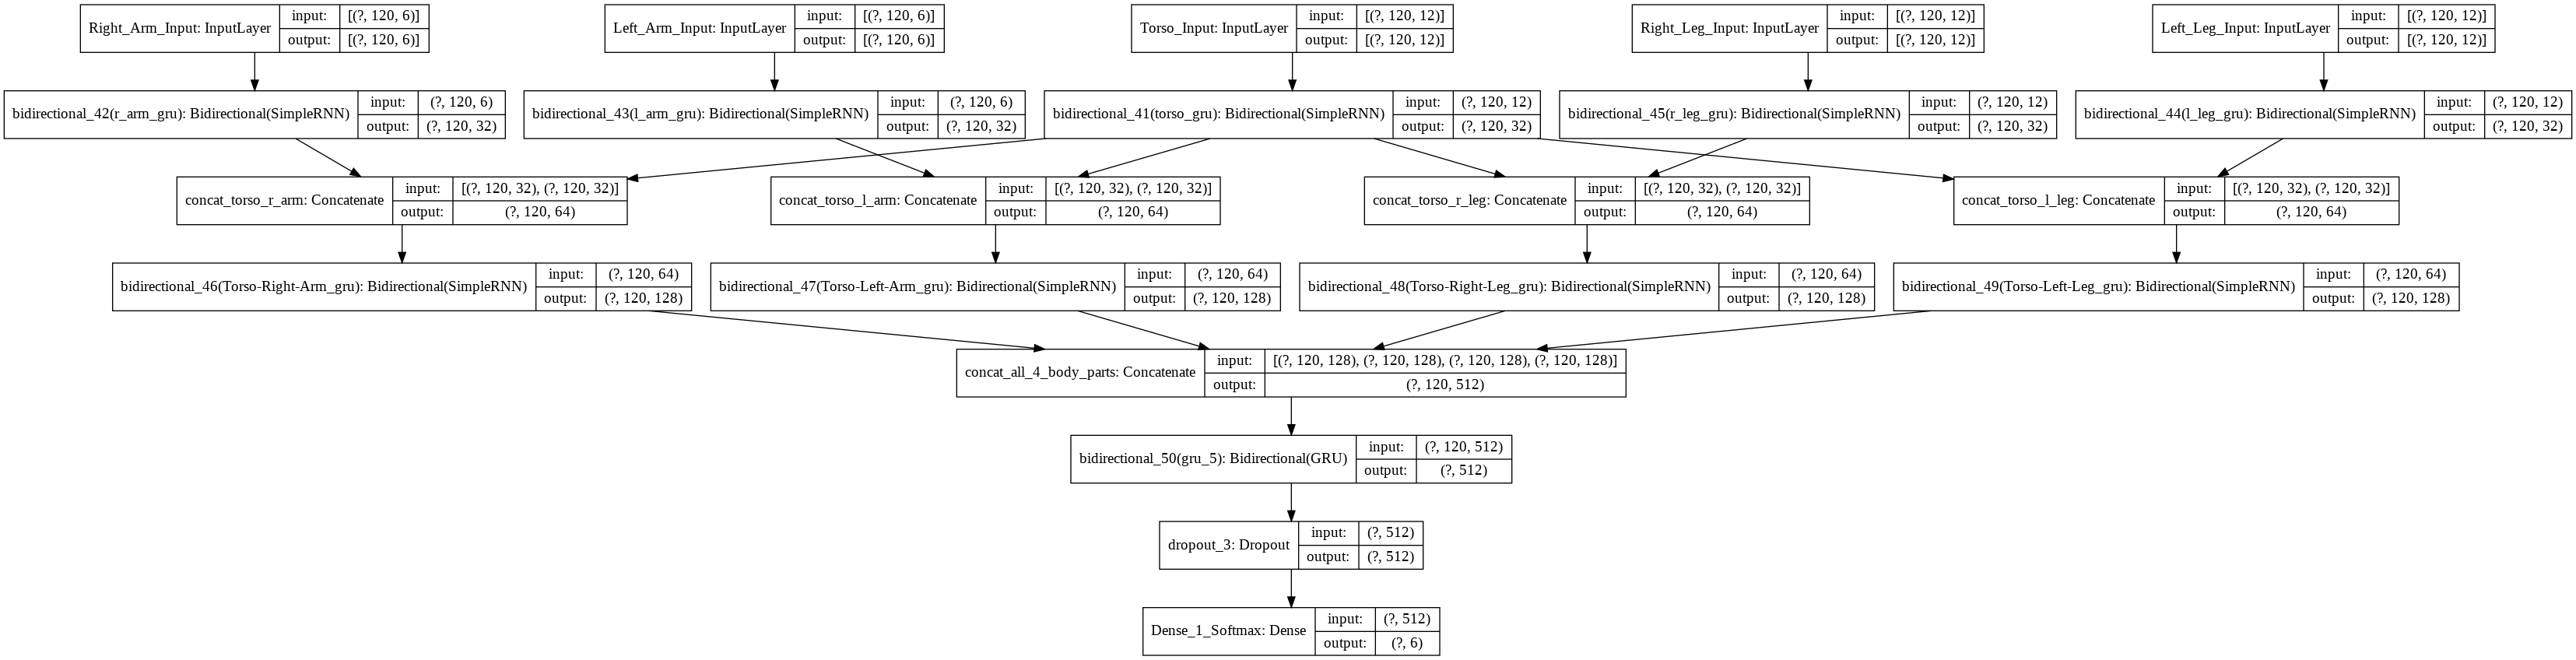

In [43]:
import os
import numpy as np
import random

import matplotlib.pyplot as plt

#Hyper-parameters 

batch_size = 64
num_epochs = 50
import numpy as np

#Create dictionary entries of all data. 
py_train_path = 'gdrive/My Drive/Seizure2/Video_Dataset/npys/'


params ={'location': py_train_path,
        'dim': (120, 12, 5),
          'batch_size': batch_size,
          'n_classes': 6,
          'n_channels': 1,
          'shuffle': True}

validation_params ={'location': py_train_path,
        'dim': (120, 12, 5),
          'batch_size': len(data['validation']),
          'n_classes': 6,
          'n_channels': 1,
          'shuffle': True}
        
test_params = {'location': py_train_path,
        'dim': (120, 12, 5),
          'batch_size': len(data['test']),
          'n_classes': 6,
          'n_channels': 1,
          'shuffle': True}
testing_generator = DataGenerator(data['test'], labels, **test_params)
training_generator = DataGenerator(data['train'], labels, **params)
validating_generator = DataGenerator(data['validation'], labels, **validation_params)

histories = []
# model = build_model_bi_gru_transfer()
# build_model_bi_gru_transfer_larger
model = build_model_bi_gru_transfer_larger()
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)
# tf.keras.utils.plot_model(model, show_shapes=True, to_file='model_shape.png')
# filepath="bi-tran-gru-s-dr-{epoch:02d}-{val_loss:.2f}.hdf5"
# checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [checkpoint]

# history = model.fit_generator(generator=training_generator, validation_data=validating_generator, callbacks = callbacks_list, validation_freq = 1, use_multiprocessing=True, workers=8, epochs=num_epochs,verbose=1)
# histories.append(history)

In [0]:
!rm *.hdf5

loss
accuracy
val_loss
val_accuracy


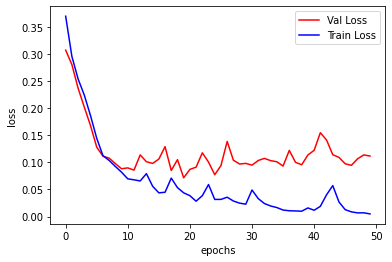

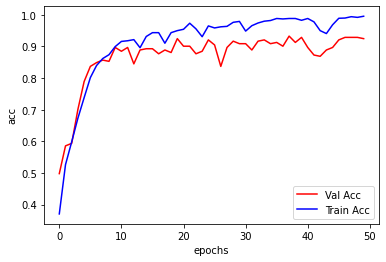

In [16]:
#Plot training. 
import matplotlib.pyplot as plt
for h in history.history:
    print(h)

history = histories[0]
plt.figure()
val_loss = history.history['val_loss']
loss = history.history['loss']
plt.xlabel('epochs')
plt.ylabel('loss')
num_epochs = range(50)

plt.plot(num_epochs, val_loss[:len(num_epochs)], 'r', label = 'Val Loss')
plt.plot( num_epochs, loss[:len(num_epochs)], 'b', label = 'Train Loss')
plt.legend()
plt.show()

val_loss = history.history['val_accuracy']
loss = history.history['accuracy']
plt.xlabel('epochs')
plt.ylabel('acc')
num_epochs = range(50)

plt.plot(num_epochs, val_loss[:len(num_epochs)], 'r', label = 'Val Acc')
plt.plot( num_epochs, loss[:len(num_epochs)], 'b', label = 'Train Acc')
plt.legend()
plt.show()

In [0]:
!rm *.png

In [17]:

j_model = tf.keras.models.load_model('bi-tran-gru-s-dr-20-0.07.hdf5')

py_train_path = 'gdrive/My Drive/Seizure2/Video_Dataset/npys/'
test_params = {'location': py_train_path,
        'dim': (120, 12, 5),
          'batch_size': len(data['test']),
          'n_classes': 6,
          'n_channels': 1,
          'shuffle': True}

testing_generator = DataGenerator(data['test'], labels, **test_params)
j_model.evaluate_generator(generator=testing_generator, steps=None, callbacks=None, max_queue_size=10, workers=0, use_multiprocessing=False, verbose=1)

1/1 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9093


[0.07589619606733322, 0.9093078970909119]

In [0]:
print(labels)

{'person06_jogging_d4_uncomp_1.npy': 1, 'person06_jogging_d4_uncomp_2.npy': 1, 'person05_jogging_d1_uncomp_1.npy': 1, 'person05_jogging_d1_uncomp_2.npy': 1, 'person05_jogging_d1_uncomp_3.npy': 1, 'person08_jogging_d2_uncomp_1.npy': 1, 'person08_jogging_d2_uncomp_2.npy': 1, 'person08_jogging_d2_uncomp_3.npy': 1, 'person08_jogging_d1_uncomp_1.npy': 1, 'person08_jogging_d1_uncomp_2.npy': 1, 'person08_jogging_d1_uncomp_3.npy': 1, 'person09_jogging_d2_uncomp_1.npy': 1, 'person09_jogging_d2_uncomp_2.npy': 1, 'person09_jogging_d2_uncomp_3.npy': 1, 'person09_jogging_d2_uncomp_4.npy': 1, 'person09_jogging_d1_uncomp_1.npy': 1, 'person09_jogging_d1_uncomp_2.npy': 1, 'person09_jogging_d1_uncomp_3.npy': 1, 'person08_jogging_d4_uncomp_1.npy': 1, 'person08_jogging_d4_uncomp_2.npy': 1, 'person08_jogging_d4_uncomp_3.npy': 1, 'person08_jogging_d3_uncomp_1.npy': 1, 'person08_jogging_d3_uncomp_2.npy': 1, 'person08_jogging_d3_uncomp_3.npy': 1, 'person09_jogging_d3_uncomp_1.npy': 1, 'person09_jogging_d3_unc

# Transfer Learning

In [63]:
import tensorflow as tf

# #Load Model best transfer model. 
# trans_model = tf.keras.models.load_model('bi-tran-gru-large-Dr-18-0.33.hdf5')
# # for l in trans_model.layers:
# #     print(l.name)
# #     print(l.trainable)

# for i in range(len(trans_model.layers)  - 3):
#     # print(trans_model.layers[i])
#     trans_model.layers[i].trainable = False


# last = len(trans_model.layers) - 2

# dr_out = trans_model.layers[last].output 
# # print('Print out names of layers:')
# # for l in trans_model.layers:
# #     print(l.name)
# #     print(l.trainable)

# all_out_3 = tf.keras.layers.Dense(1, activation='sigmoid', name='Dense_Sigmoid')(dr_out)

# model = tf.keras.models.Model(inputs=trans_model.input, outputs = all_out_3)

# adam_1 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
# model.compile(optimizer=adam_1, loss='binary_crossentropy', metrics=['accuracy'])



#Less Trainable Model. 
trans_model = tf.keras.models.load_model('bi-tran-gru-large-Dr-18-0.33.hdf5')

for i in range(len(trans_model.layers)  - 1):
    # print(trans_model.layers[i])
    trans_model.layers[i].trainable = False

last = len(trans_model.layers) - 2
print(trans_model.layers[last].name)



less_out = trans_model.layers[last].output
less_out = tf.keras.layers.Dense(1,activation='sigmoid', name='Dense_Sigmoid')(less_out)

less_model = tf.keras.models.Model(inputs=trans_model.input, outputs = less_out)
adam_1 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
less_model.compile(optimizer=adam_1, loss='binary_crossentropy', metrics=['accuracy'])



dropout


Torso_Input
False
Right_Arm_Input
False
Left_Arm_Input
False
Right_Leg_Input
False
Left_Leg_Input
False
bidirectional
False
bidirectional_1
False
bidirectional_2
False
bidirectional_4
False
bidirectional_3
False
concat_torso_r_arm
False
concat_torso_l_arm
False
concat_torso_r_leg
False
concat_torso_l_leg
False
bidirectional_5
False
bidirectional_6
False
bidirectional_7
False
bidirectional_8
False
concat_all_4_body_parts
False
bidirectional_9
False
dropout
False
Dense_Sigmoid
True


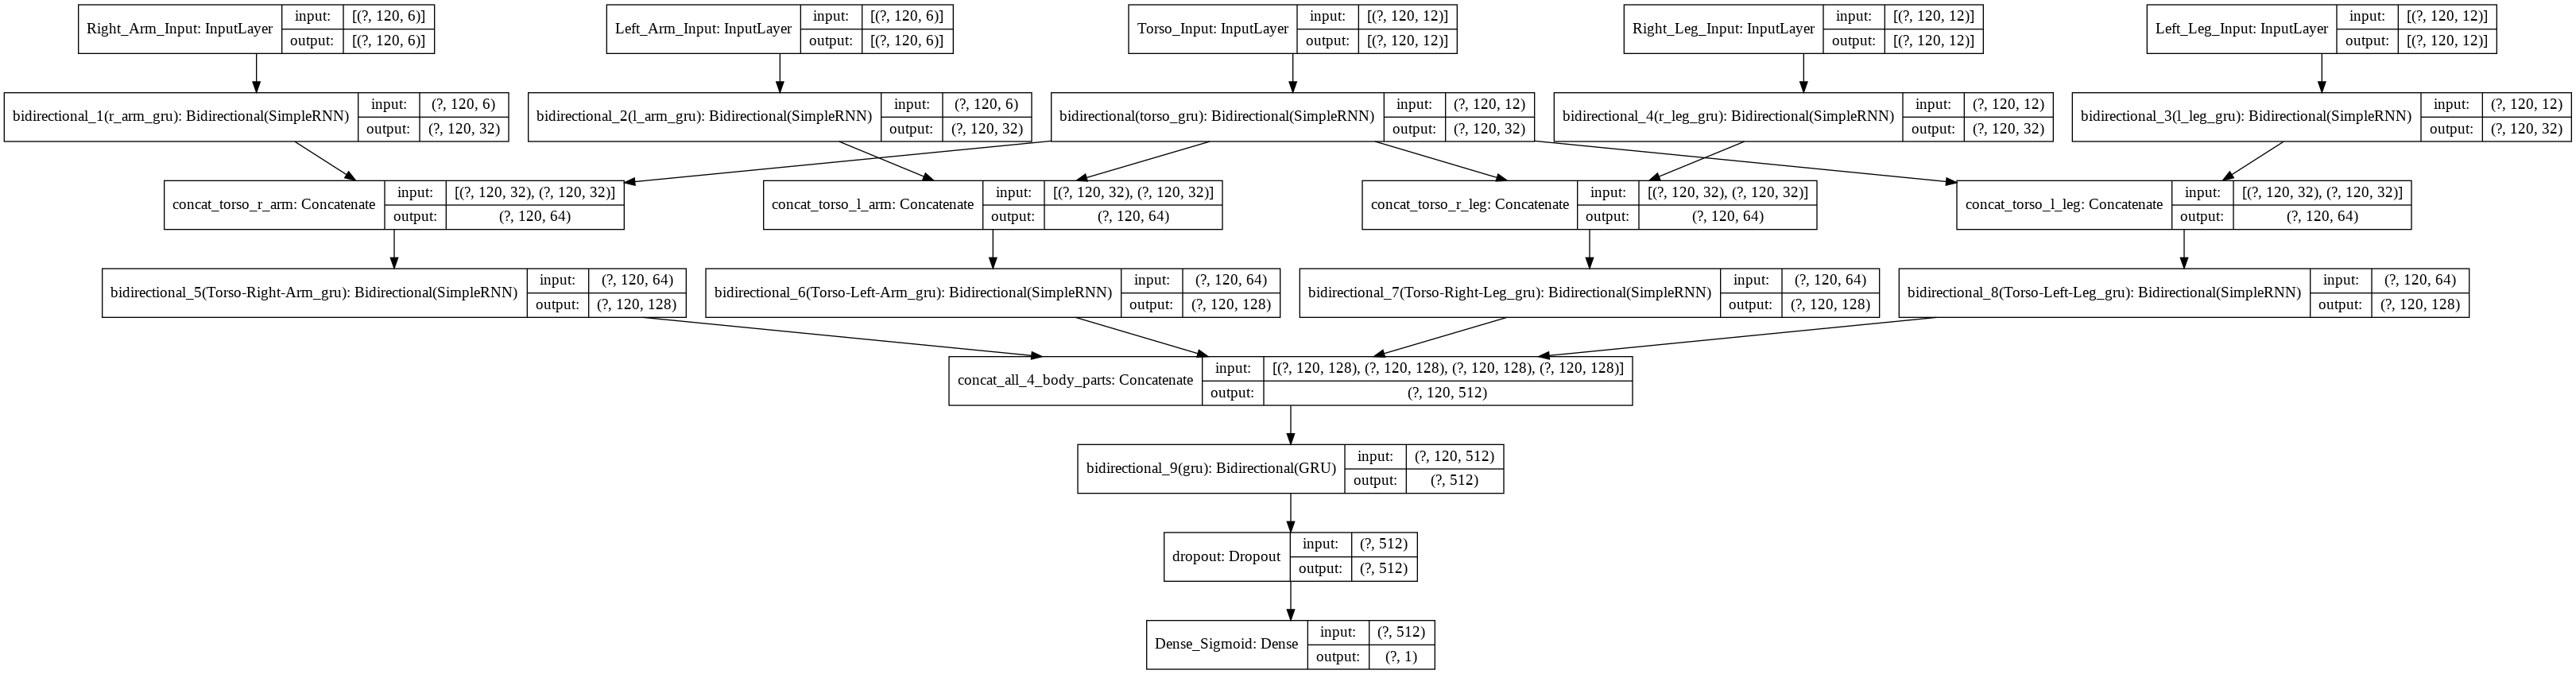

In [64]:
for l in less_model.layers:
    print(l.name)
    print(l.trainable)

tf.keras.utils.plot_model(model, show_shapes=True)

In [65]:
less_model.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Torso_Input (InputLayer)        [(None, 120, 12)]    0                                            
__________________________________________________________________________________________________
Right_Arm_Input (InputLayer)    [(None, 120, 6)]     0                                            
__________________________________________________________________________________________________
Left_Arm_Input (InputLayer)     [(None, 120, 6)]     0                                            
__________________________________________________________________________________________________
Right_Leg_Input (InputLayer)    [(None, 120, 12)]    0                                            
___________________________________________________________________________________________

In [52]:
#Training
import numpy as np
import random 
import os 

#For no more tensor flow warnings. 
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

#Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

#Get good ratio of training/validation/testing data. 
import os 
import random
import numpy as np
print(len(os.listdir('gdrive/My Drive/Seizure2/all_data_hd_npy/')))

data_files = os.listdir('gdrive/My Drive/Seizure2/all_data_hd_npy/')

data = {}
labels = {}

for _name in data_files:
    if 'Seizure' in _name:
        labels[_name] = 1
    else:
        labels[_name] = 0

random.seed(3)
random.shuffle(data_files)

num_seizure_files = len([ _name for _name in data_files if 'Seizure' in _name])

train_index = int(len(data_files) * .8)
validation_index = int(train_index * .15)

data['test'] = np.array(data_files[train_index:])
data['validation'] = np.array(data_files[:validation_index])
data['train'] = np.array(data_files[validation_index:train_index])

print('Number of Seizure data in dataset: ', num_seizure_files)
print('Total number of files: ', len(data_files))
print('Percentage of Seizure data in dataset: {} %'.format(num_seizure_files/len(data_files)*100))

num_seizure_files_train = len([ _name for _name in data['train'] if 'Seizure' in _name])
num_seizure_files_test = len([ _name for _name in data['test'] if 'Seizure' in _name])
num_seizure_files_validation = len([ _name for _name in data['validation'] if 'Seizure' in _name])

print('Number of training samples: ', len(data['train']))
print('Number of testing samples: ', len(data['test']))
print('Number of validation samples: ', len(data['validation']))
print('Total: ', len(data['train']) + len(data['test']) + len(data['validation']))

print('Percentage of Seizure data in training dataset: {} %'.format(num_seizure_files_train/len(data['train'])*100))
print('Percentage of Seizure data in testing dataset: {} %'.format(num_seizure_files_test/len(data['test'])*100))
print('Percentage of Seizure data in validation dataset: {} %'.format(num_seizure_files_validation/len(data['validation'])*100))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
3124
Number of Seizure data in dataset:  922
Total number of files:  3124
Percentage of Seizure data in dataset: 29.513444302176694 %
Number of training samples:  2125
Number of testing samples:  625
Number of validation samples:  374
Total:  3124
Percentage of Seizure data in training dataset: 30.070588235294117 %
Percentage of Seizure data in testing dataset: 27.200000000000003 %
Percentage of Seizure data in validation dataset: 30.213903743315505 %


Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Torso_Input (InputLayer)        [(None, 120, 12)]    0                                            
__________________________________________________________________________________________________
Right_Arm_Input (InputLayer)    [(None, 120, 6)]     0                                            
__________________________________________________________________________________________________
Left_Arm_Input (InputLayer)     [(None, 120, 6)]     0                                            
__________________________________________________________________________________________________
Right_Leg_Input (InputLayer)    [(None, 120, 12)]    0                                            
___________________________________________________________________________________________

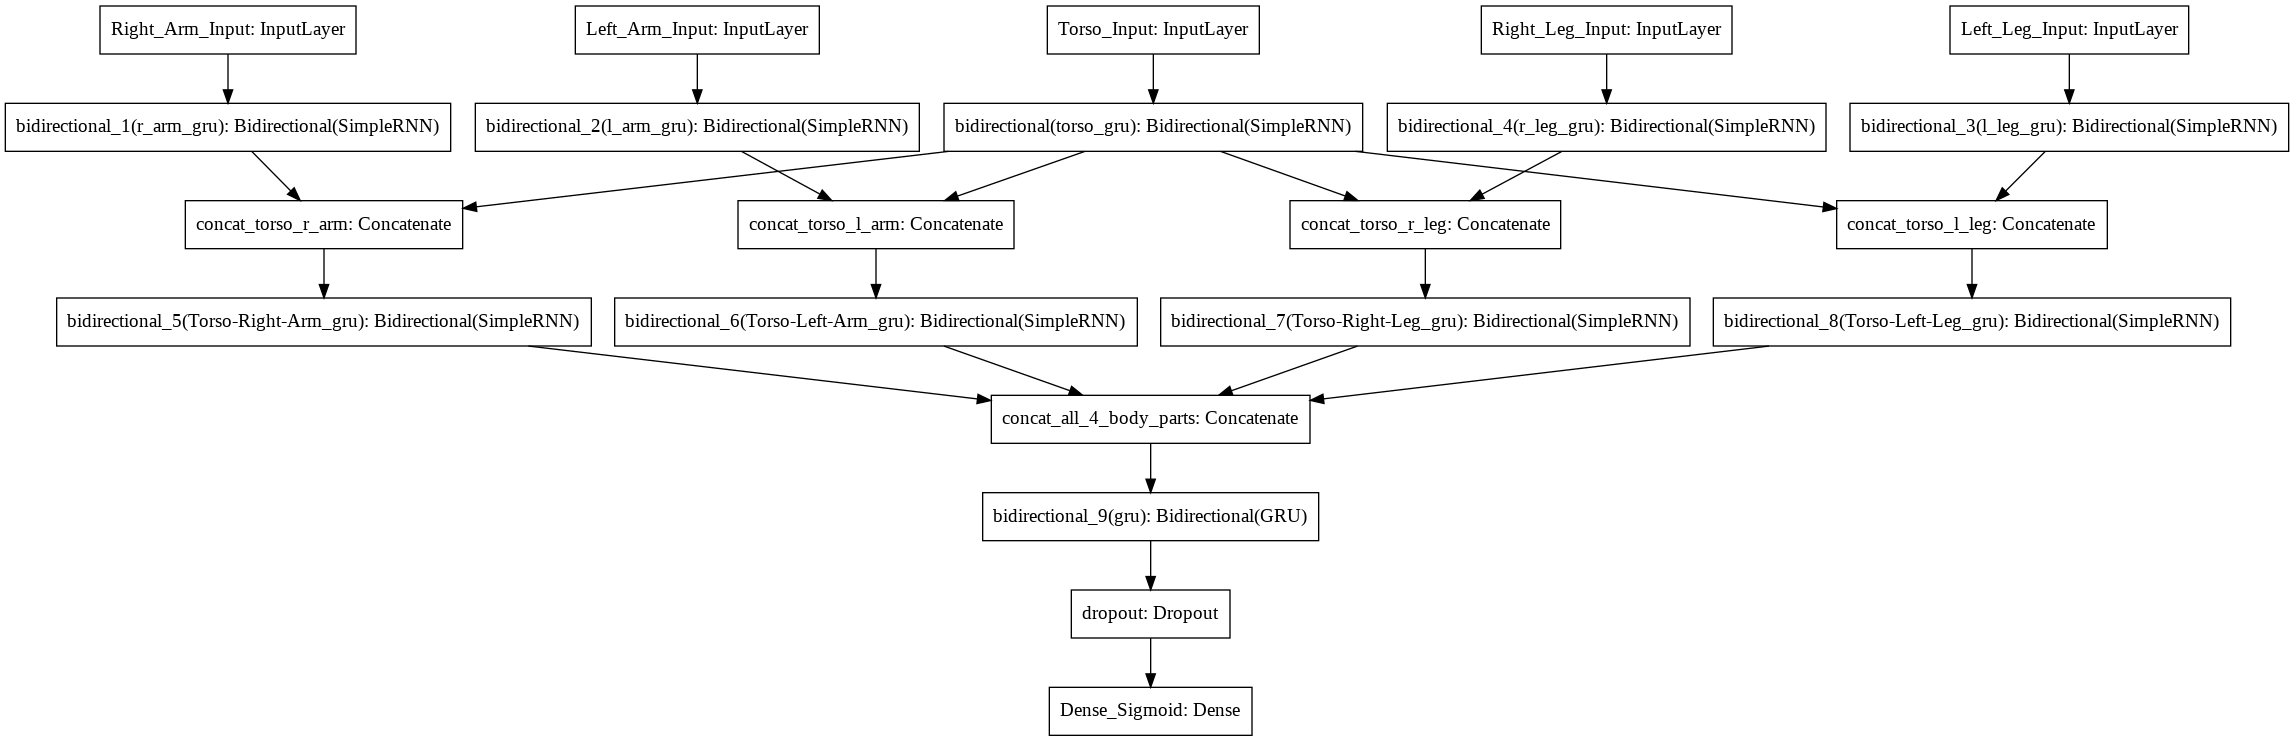

In [71]:
less_model.summary()
tf.keras.utils.plot_model(less_model)

In [67]:
import os
import numpy as np
import random

import matplotlib.pyplot as plt

#Hyper-parameters 

batch_size = 64
num_epochs = 50
import numpy as np

#Create dictionary entries of all data. 
py_train_path = 'gdrive/My Drive/Seizure2/all_data_hd_npy/'


params ={'location': py_train_path,
        'dim': (120, 12, 5),
          'batch_size': batch_size,
          'n_classes': 1,
          'n_channels': 1,
          'shuffle': True}

validation_params ={'location': py_train_path,
        'dim': (120, 12, 5),
          'batch_size': len(data['validation']),
          'n_classes': 1,
          'n_channels': 1,
          'shuffle': True}
        
test_params = {'location': py_train_path,
        'dim': (120, 12, 5),
          'batch_size': len(data['test']),
          'n_classes': 1,
          'n_channels': 1,
          'shuffle': True}
testing_generator = DataGenerator(data['test'], labels, **test_params)
training_generator = DataGenerator(data['train'], labels, **params)
validating_generator = DataGenerator(data['validation'], labels, **validation_params)

histories = []
# model = build_model_bi_gru_drop()
less_model.summary()


tf.keras.utils.plot_model(model, show_shapes=True, to_file='model_shape.png')
filepath="trans-seizure-lessparams-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=training_generator, validation_data=validating_generator, callbacks = callbacks_list, validation_freq = 1, use_multiprocessing=True, workers=8, epochs=num_epochs,verbose=1)
histories.append(history)

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Torso_Input (InputLayer)        [(None, 120, 12)]    0                                            
__________________________________________________________________________________________________
Right_Arm_Input (InputLayer)    [(None, 120, 6)]     0                                            
__________________________________________________________________________________________________
Left_Arm_Input (InputLayer)     [(None, 120, 6)]     0                                            
__________________________________________________________________________________________________
Right_Leg_Input (InputLayer)    [(None, 120, 12)]    0                                            
___________________________________________________________________________________________

In [68]:

j_model = tf.keras.models.load_model('trans-seizure-lessparams-10-0.04.hdf5')

py_train_path = 'gdrive/My Drive/Seizure2/all_data_hd_npy/'
test_params = {'location': py_train_path,
        'dim': (120, 12, 5),
          'batch_size': len(data['test']),
          'n_classes': 1,
          'n_channels': 1,
          'shuffle': True}
testing_generator = DataGenerator(data['test'], labels, **test_params)
j_model.evaluate_generator(generator=testing_generator, steps=None, callbacks=None, max_queue_size=10, workers=0, use_multiprocessing=False, verbose=1)

1/1 [==============================] - 0s 1ms/step - loss: 0.0671 - accuracy: 0.9824


[0.06713049113750458, 0.9824000000953674]

loss
accuracy
val_loss
val_accuracy


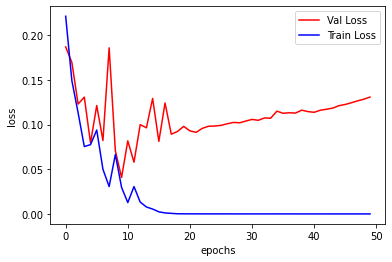

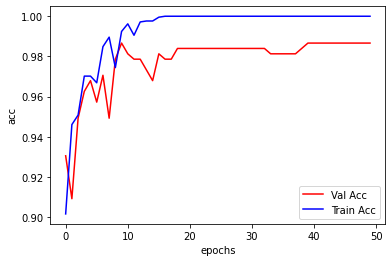

In [69]:
#Plot training. 
import matplotlib.pyplot as plt
for h in history.history:
    print(h)

history = histories[0]
plt.figure()
val_loss = history.history['val_loss']
loss = history.history['loss']
plt.xlabel('epochs')
plt.ylabel('loss')
num_epochs = range(50)

plt.plot(num_epochs, val_loss[:len(num_epochs)], 'r', label = 'Val Loss')
plt.plot( num_epochs, loss[:len(num_epochs)], 'b', label = 'Train Loss')
plt.legend()
plt.show()

val_loss = history.history['val_accuracy']
loss = history.history['accuracy']
plt.xlabel('epochs')
plt.ylabel('acc')
num_epochs = range(50)

plt.plot(num_epochs, val_loss[:len(num_epochs)], 'r', label = 'Val Acc')
plt.plot( num_epochs, loss[:len(num_epochs)], 'b', label = 'Train Acc')
plt.legend()
plt.show()